In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

In [2]:
heart_disease=pd.read_csv(r"C:\Users\Chiselas\Assignments\Assignment 9\heart.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
numerical_discrete = []

for var in heart_disease.columns:
    if heart_disease[var].nunique()<10:
        
        numerical_discrete.append(var)
numerical_discrete.remove('target')
numerical_discrete

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [7]:
numerical_continuous = []
for var in heart_disease.columns:
    if heart_disease[var].nunique()>= 10:
            numerical_continuous.append(var)

numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

<AxesSubplot:>

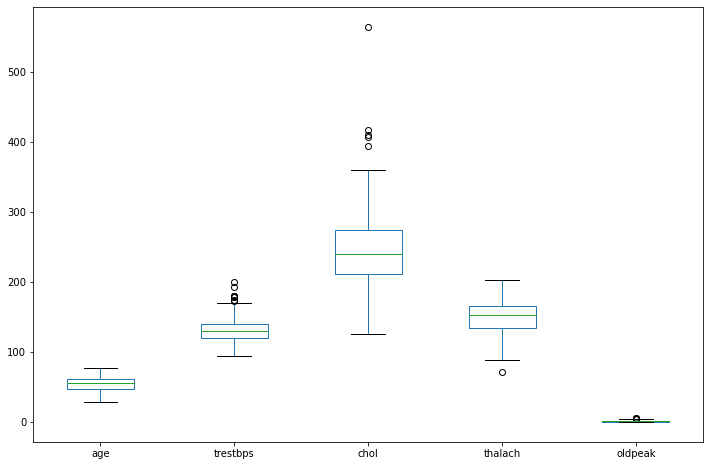

In [8]:
heart_disease[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

In [9]:
def remove_outlier(col):
    for var in heart_disease[numerical_continuous]:
        q25 = col.quantile(0.25)
        q75 = col.quantile(0.75)
        iqr = q75 - q25
        cutoff = iqr*1.3
        lower = q25 - cutoff
        upper = q75 + cutoff
        return lower, upper
        
    

lower, upper = remove_outlier(heart_disease.trestbps)
heart_disease = heart_disease.loc[(heart_disease.trestbps > lower) & (heart_disease.trestbps < upper)]
lower, upper = remove_outlier(heart_disease.chol)
heart_disease = heart_disease.loc[(heart_disease.chol > lower) & (heart_disease.chol < upper)]
lower, upper = remove_outlier(heart_disease.thalach)
heart_disease = heart_disease.loc[(heart_disease.thalach > lower) & (heart_disease.thalach < upper)]
lower, upper = remove_outlier(heart_disease.oldpeak)
heart_disease = heart_disease.loc[(heart_disease.oldpeak > lower) & (heart_disease.oldpeak < upper)]

<AxesSubplot:>

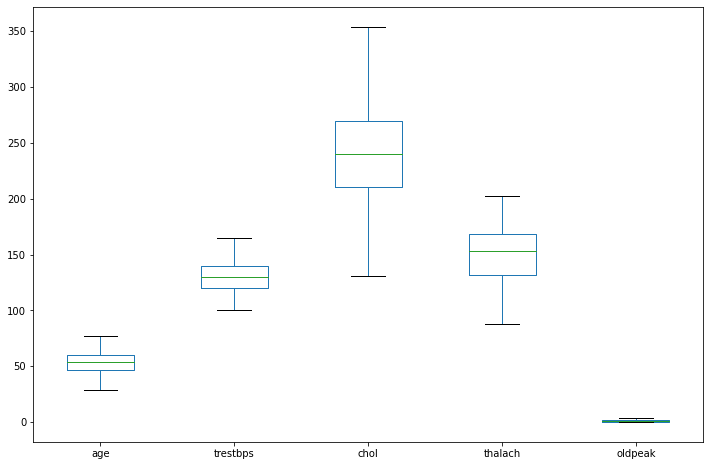

In [10]:
heart_disease[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

In [11]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    int64  
 2   cp        274 non-null    int64  
 3   trestbps  274 non-null    int64  
 4   chol      274 non-null    int64  
 5   fbs       274 non-null    int64  
 6   restecg   274 non-null    int64  
 7   thalach   274 non-null    int64  
 8   exang     274 non-null    int64  
 9   oldpeak   274 non-null    float64
 10  slope     274 non-null    int64  
 11  ca        274 non-null    int64  
 12  thal      274 non-null    int64  
 13  target    274 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.1 KB


In [12]:
heart_disease['age_binned']=pd.qcut(heart_disease.age, q=[0, .25, .50, .75, 1])
heart_disease['trestbps_binned']=pd.qcut(heart_disease.age, q=[0, .25, .50, .75, 1])
heart_disease['chol_binned']=pd.qcut(heart_disease.age, q=[0, .25, .50, .75, 1])
heart_disease['thalach_binned']=pd.qcut(heart_disease.age, q=[0, .25, .50, .75, 1])

from sklearn.preprocessing import LabelEncoder
lblencode=LabelEncoder()

heart_disease['age']= lblencode.fit_transform(heart_disease['age_binned'])
heart_disease['trestbps']= lblencode.fit_transform(heart_disease['trestbps_binned'])
heart_disease['chol']= lblencode.fit_transform(heart_disease['chol_binned'])
heart_disease['thalach']= lblencode.fit_transform(heart_disease['thalach_binned'])

heart_disease.drop(columns=['age_binned', 'trestbps_binned', 'chol_binned', 'thalach_binned'], inplace= True)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,3,3,1,0,3,0,2.3,0,0,1,1
1,0,1,2,0,0,0,1,0,0,3.5,0,0,2,1
2,0,0,1,0,0,0,0,0,0,1.4,2,0,2,1
3,2,1,1,2,2,0,1,2,0,0.8,2,0,2,1
4,2,0,0,2,2,0,1,2,1,0.6,2,0,2,1


In [13]:
X=heart_disease.drop(['target'], axis=1)
y=heart_disease['target']


In [20]:
from scipy.stats import chi2_contingency
chi_check = []
for i in X.columns:
    if chi2_contingency(pd.crosstab(heart_disease['target'], heart_disease[i]))[1] < 0.5:
        chi_check.append('Reject Null Hypothesis')
    else:
        chi_check.append('Fail to Reject Null Hypothesis')
check = pd.DataFrame(data = [X.columns, chi_check] 
             ).T 
check.columns = ['Column', 'Hypothesis']
print(check)

      Column                      Hypothesis
0        age          Reject Null Hypothesis
1        sex          Reject Null Hypothesis
2         cp          Reject Null Hypothesis
3   trestbps          Reject Null Hypothesis
4       chol          Reject Null Hypothesis
5        fbs  Fail to Reject Null Hypothesis
6    restecg          Reject Null Hypothesis
7    thalach          Reject Null Hypothesis
8      exang          Reject Null Hypothesis
9    oldpeak          Reject Null Hypothesis
10     slope          Reject Null Hypothesis
11        ca          Reject Null Hypothesis
12      thal          Reject Null Hypothesis


In [22]:
X=X.drop('fbs', axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
X_train = stdscalar.fit_transform(X_train)
X_test = stdscalar.transform(X_test)
X_train

array([[ 1.28232715,  0.64967524, -0.91881454, ...,  0.98065547,
         1.26910213, -2.18123688],
       [ 1.28232715, -1.53923058,  1.08337834, ..., -0.68417824,
        -0.73041849, -0.51098906],
       [-0.50639671,  0.64967524, -0.91881454, ..., -0.68417824,
         0.26934182, -0.51098906],
       ...,
       [ 1.28232715, -1.53923058,  1.08337834, ...,  0.98065547,
         0.26934182, -0.51098906],
       [-0.50639671, -1.53923058,  1.08337834, ...,  0.98065547,
        -0.73041849, -0.51098906],
       [ 0.38796522,  0.64967524,  1.08337834, ..., -0.68417824,
         0.26934182,  1.15925876]])

In [26]:
y_train.value_counts()


1    125
0     94
Name: target, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({0: 125, 1: 125})


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()}

In [29]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_over, y_train_over)
    train_score = round(classifier.score(X_train_over, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test, y_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.85, 0.88, 0.91, 1.0, 1.0]
[0.8, 0.8, 0.73, 0.75, 0.71]


In [30]:
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_over, y_train_over)
    train_score = cross_val_score(classifier, X_train_over, y_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_test, y_test, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.84, 0.83, 0.86, 0.8, 0.82]
[0.75, 0.82, 0.82, 0.75, 0.84]


In [42]:
from sklearn.model_selection import GridSearchCV
kn = KNeighborsClassifier()
kn_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
grid_kn = GridSearchCV(kn, kn_params)
grid_kn.fit(X_train_over, y_train_over)
grid_kn.best_params_

{'algorithm': 'auto', 'n_neighbors': 6}

In [45]:
kn_best = KNeighborsClassifier(n_neighbors=6, algorithm='auto')
kn_best.fit(X_train_over, y_train_over)
kn_best.score(X_test, y_test)

0.8181818181818182

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(kn_best, X_test, y_test, cv=5)

array([0.72727273, 0.81818182, 0.81818182, 0.90909091, 0.90909091])

In [47]:
from sklearn.metrics import classification_report
y_preds= kn_best.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.77      0.93      0.84        29

    accuracy                           0.82        55
   macro avg       0.84      0.81      0.81        55
weighted avg       0.83      0.82      0.81        55



In [48]:
from sklearn.metrics import confusion_matrix
y_preds = kn_best.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[18,  8],
       [ 2, 27]], dtype=int64)

In [49]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,18,8
1,2,27


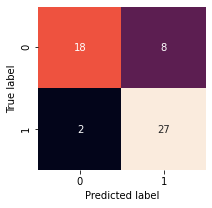

In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt
def plot_conf_mat(conf_mat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(y_test, y_preds)

plot_conf_mat(conf_mat)

In [52]:
from sklearn.metrics import roc_auc_score
y_probs = kn_best.predict_proba(X_test)
y_probs = y_probs[:, 1]
roc_auc_score(y_test, y_probs)


0.8660477453580901

This shows that there is an 86.6% chance that the classifier will assign a higher predicted probability to a positive or true observation.

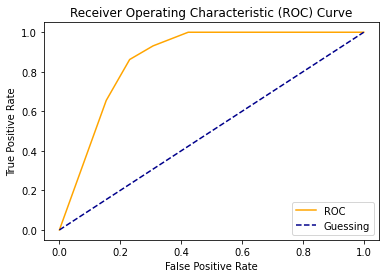

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)    

A threshold that has a higher cost False Positive rate would be ideal because given the context of the data, there is a greater penalty on failing to diagnose a patient that has heart disease than falsely diagnosing a patient.

In [53]:
from joblib import dump
dump(kn_best, filename='classification_model.joblib')

['classification_model.joblib']